In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sys import path
path.append('..')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
np.set_printoptions(threshold=sys.maxsize)
#from solar_data_pipeline.database.cassandra import CassandraDataAccess
from solardatatools import standardize_time_axis, make_2d, plot_2d, fix_time_shifts
from statistical_clear_sky.utilities.data_conversion import make_time_series

In [6]:
from os.path import expanduser
home = expanduser("~")
with open(home + "/.aws/cassandra_cluster") as f:
    cluster_ip = f.readline().strip('\n')

In [5]:
data_access = CassandraDataAccess(cluster_ip)

In [6]:
actual_sites = data_access.get_sites()

In [7]:
actual_sites

array(['TADCC1019626', 'TAEAC1006600', 'TAEJC1015097', '0022F20186EC',
       'TABJC1001537', 'TACHC1021312', 'TADBC1076792', 'TADBC1077777',
       '001C4B001069', 'ZT163185000441C2053', 'TAECC1047947',
       'ZT162885000441C0559', 'TACHC1061451', 'TABD01110568',
       'TAEEC1018184', '001C4B0008A5', 'TACHC1020295', 'TADHC1036570',
       'ZT163285000441C1183', 'TAELC1031675', 'ZT160385000441C0394',
       'TACIC1066981', 'ZT161685000441C0119', 'TABF01112766',
       'TAEIC1067492', 'TAEJC1015722', 'TAEAC1064320', 'TABJC1067646',
       'TACIC1038743', 'ZT162085000441C0903', '0022F2002E82',
       'ZT155185000441C0083', 'ZT164285000441C0753',
       'ZT161685000441C0141', 'ZT163485000441C0414', 'TADBC1077995',
       'TAEFC1044741', 'TABJC1001611', 'TACLC1036595', 'TADBC1077912',
       'TABC01142170', 'ZT155285000441C0186', 'ZT162185000441C1092',
       'TADBC1076464', 'TABG01081601', 'ZT155085000441C0412',
       'TACHC1022171', 'TADKC1043032', 'TABGC1044151', 'TABJC1027159',
    

In [7]:
from cassandra.cluster import Cluster
from os.path import expanduser
home = expanduser("~")
with open(home+'/.aws/cassandra_cluster') as f:
    cluster_ip = f.readline().strip('\n')
cluster = Cluster([cluster_ip])
session = cluster.connect('measurements')
cql = """
    select site, meas_name, ts, sensor, meas_val_f 
    from measurement_raw
    where site in ('TADBC1078041')
        and meas_name = 'ac_power';
"""
rows = session.execute(cql)
#list(rows)

In [9]:
df = pd.DataFrame(list(rows))
df.replace(-999999.0, np.NaN, inplace=True)

In [12]:
data = standardize_time_axis(make_time_series(df, return_keys=False))

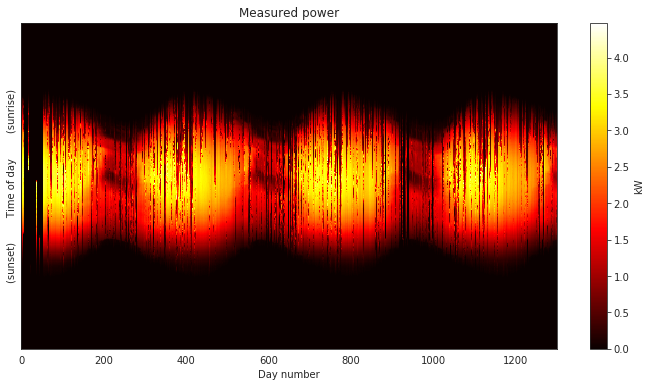

In [14]:
power_matrix = make_2d(data, key='ac_power_01')
plot_2d(power_matrix);

In [14]:
power_matrix.shape

(288, 59)

In [16]:
power_matrix = data_access.retrieve(sites=['TADCC1019626'])
power_matrix

array([[ 1.47200003e-01,  1.32599995e-01,  5.46000004e-02,
         1.28000006e-01,  7.89000019e-02,  4.56999987e-02,
         1.49000004e-01,  6.12999983e-02,  5.53000011e-02,
         7.15999976e-02,  5.81000000e-02,  7.71000013e-02,
         4.54000011e-02,  8.51000026e-02,  1.08000003e-01,
         1.12099998e-01,  8.69000033e-02,  1.15599997e-01,
         7.76000023e-02,  5.86000010e-02,  2.07900003e-01,
         1.60500005e-01,  3.98999989e-01,  5.64999990e-02,
         4.74999994e-02,  0.00000000e+00,  6.18799984e-01,
         5.12399971e-01,  6.99299991e-01,  6.78300023e-01,
         6.41799986e-01,  5.78000009e-01,  6.34800017e-01,
         3.57800007e-01,  7.14999974e-01,  4.20399994e-01,
         8.38400006e-01,  9.15400028e-01,  1.06200004e+00,
         0.00000000e+00,  1.02520001e+00,  1.58099994e-01,
         4.25000004e-02,  5.94299972e-01,  1.16939998e+00,
         1.21469998e+00,  6.41200006e-01,  6.64799988e-01,
         9.87600029e-01,  9.54100013e-01,  1.06270003e+0

In [17]:
power_matrix.shape

(288, 79)

In [18]:
sites = data_access._get_site_lists_for_retrieve(sites=['TADCC1019626'])
sites

['TADCC1019626']

In [19]:
data_candidates = data_access._get_data_candidate(sites)
data_candidates

{'TADCC1019626': array([[ 1.47200003e-01,  1.32599995e-01,  5.46000004e-02,
          1.28000006e-01,  7.89000019e-02,  4.56999987e-02,
          1.49000004e-01,  6.12999983e-02,  5.53000011e-02,
          7.15999976e-02,  5.81000000e-02,  7.71000013e-02,
          4.54000011e-02,  8.51000026e-02,  1.08000003e-01,
          1.12099998e-01,  8.69000033e-02,  1.15599997e-01,
          7.76000023e-02,  5.86000010e-02,  2.07900003e-01,
          1.60500005e-01,  3.98999989e-01,  5.64999990e-02,
          4.74999994e-02,  0.00000000e+00,  6.18799984e-01,
          5.12399971e-01,  6.99299991e-01,  6.78300023e-01,
          6.41799986e-01,  5.78000009e-01,  6.34800017e-01,
          3.57800007e-01,  7.14999974e-01,  4.20399994e-01,
          8.38400006e-01,  9.15400028e-01,  1.06200004e+00,
          0.00000000e+00,  1.02520001e+00,  1.58099994e-01,
          4.25000004e-02,  5.94299972e-01,  1.16939998e+00,
          1.21469998e+00,  6.41200006e-01,  6.64799988e-01,
          9.87600029e-01

In [22]:
data_candidates['TADCC1019626'].shape

(288, 79)

In [ ]:
data_array = data_access._query_power_for_given_site_helper('TADCC1019626') 
data_array

In [24]:
data_array.shape

(10000,)